In [ ]:
#Code from 06/13/24

# Fastag Frauds Records

## About Dataset

### The dataset comprises transaction records from the Fastag electronic toll collection system in India. It includes various features such as transaction details, vehicle information, geographical location, and transaction amounts. The dataset is labeled with a binary indicator for fraudulent activity, making it suitable for developing a fraud detection system.

In [1]:
#Import Necessary Libraries
import pandas as pd

In [2]:
#Adjust the file name if necessary based
filename = 'FastagFraudDetection.csv'
data = pd.read_csv(filename)

#Display the First Few Rows of the Dataset
print(data.head())

   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

In [3]:
#Questions: How many rows and columns does this dataset contain?

#Basic Information

In [4]:
#Display all the basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB
None


In [5]:
#Dataset Summary
print(data.describe())

       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


In [6]:
#Check for Missing Values
print(data.isnull().sum())

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


###From the data, we can say there are 549 missing Fastag ID's from the dataset.

In [7]:
#Replace Missing Values From Mean and Median for Numerical Columns Only
data.fillna(data.mean(numeric_only = True), inplace = True)

In [8]:
#Replace Missing Values From Mode for Numerical Columns Only
data['FastagID'].fillna(data['FastagID'].mode()[0], inplace = True)

In [9]:
#Verify Previous Missing Values
print(data.isnull().sum())

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64


##Data Visualization

In [10]:
#What does histogram tell you
#Outliers baed on boxplot
#What insights can you draw from

In [11]:
#Import Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns

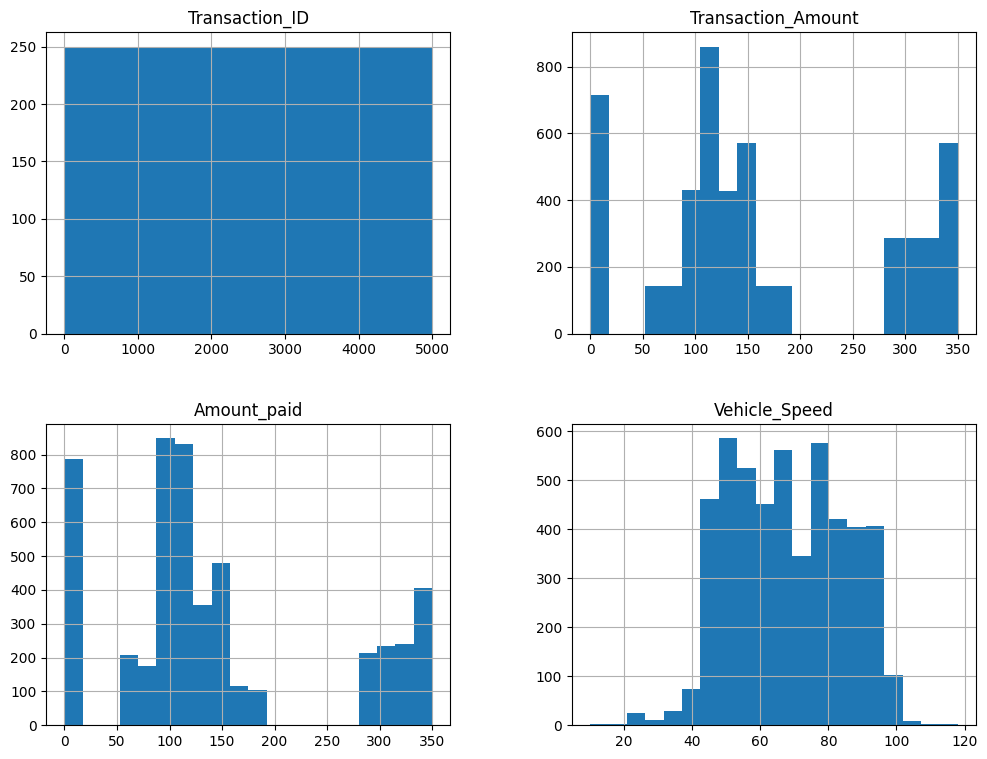

In [12]:
#Histogram for Numerical Columns
data.hist(bins = 20, figsize = (12, 9))
plt.show()

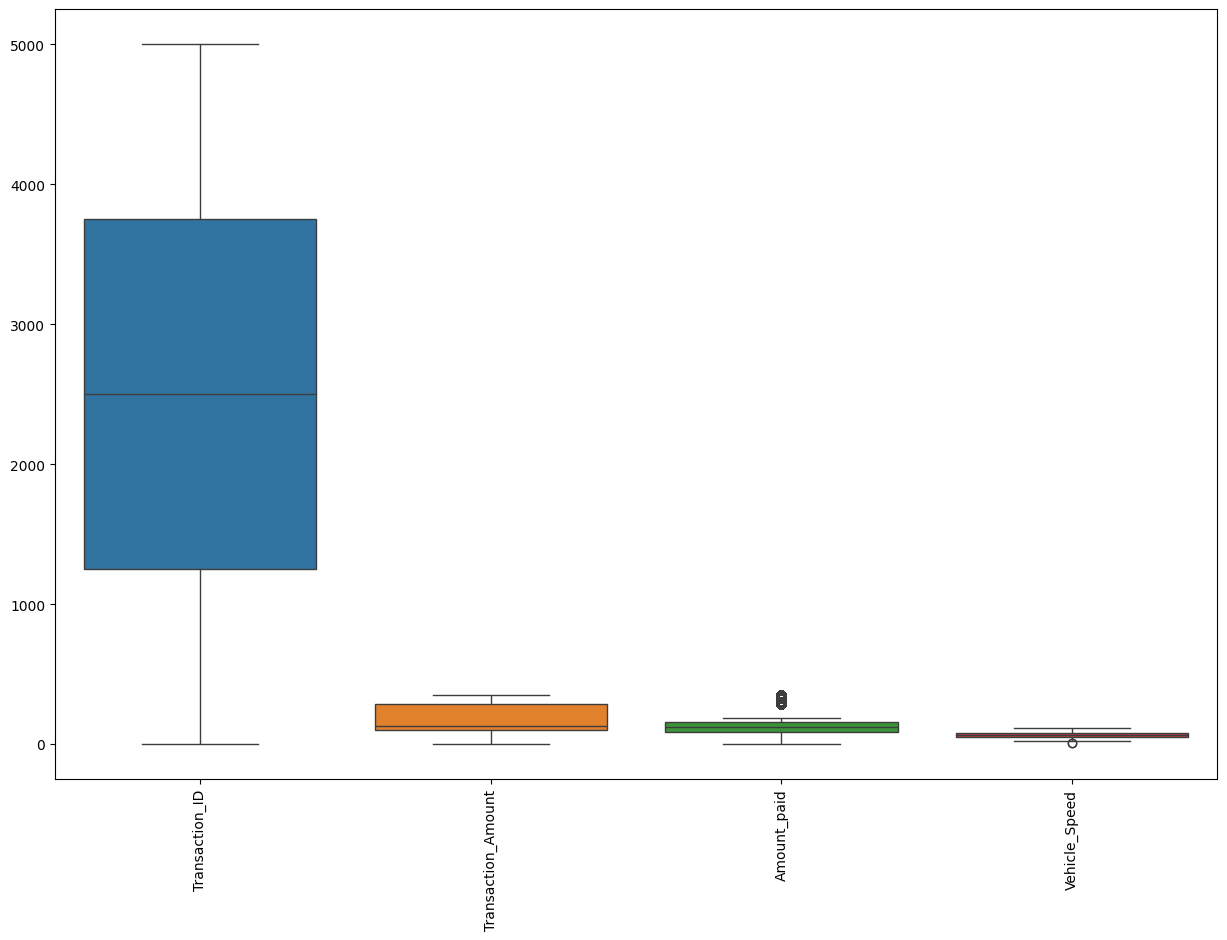

In [13]:
#Boxplot for Numerical Values
plt.figure(figsize = (15, 10))
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.show()

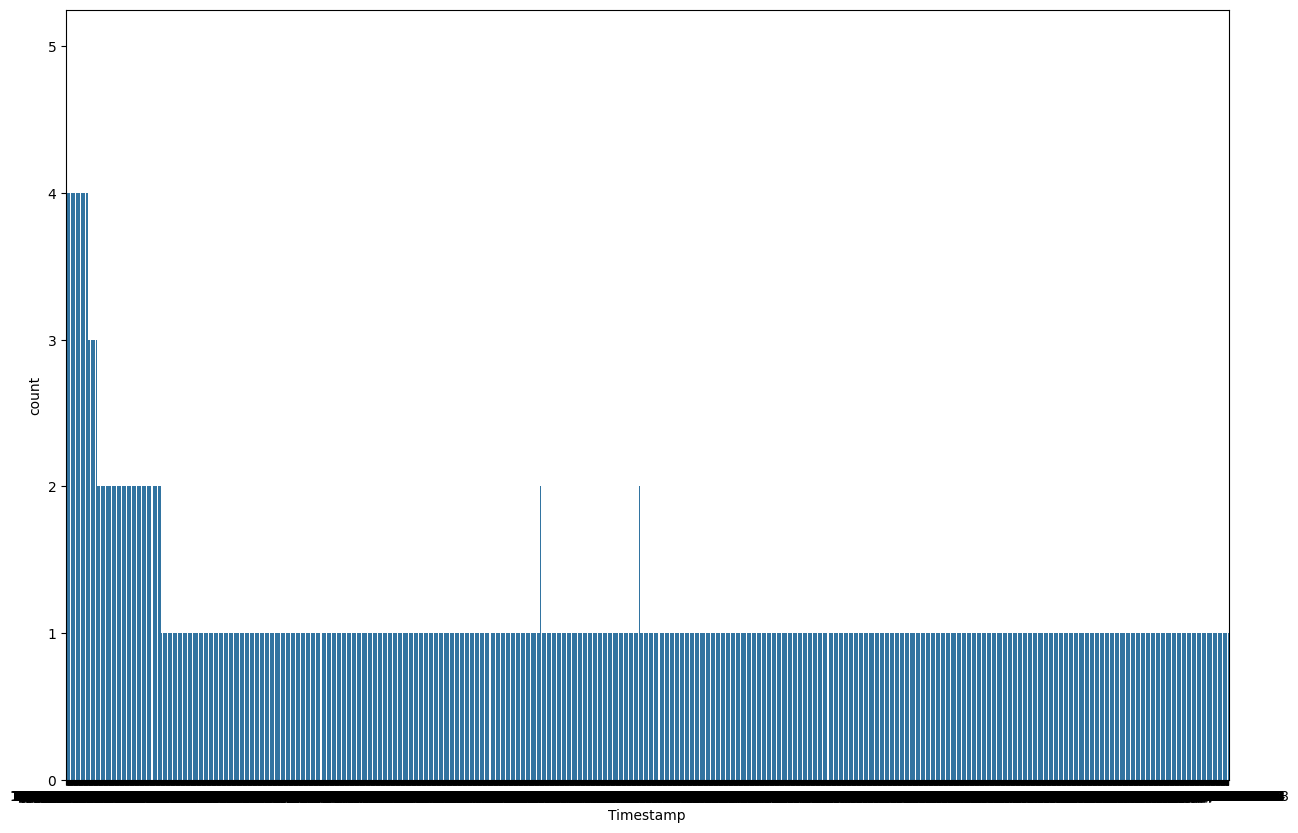

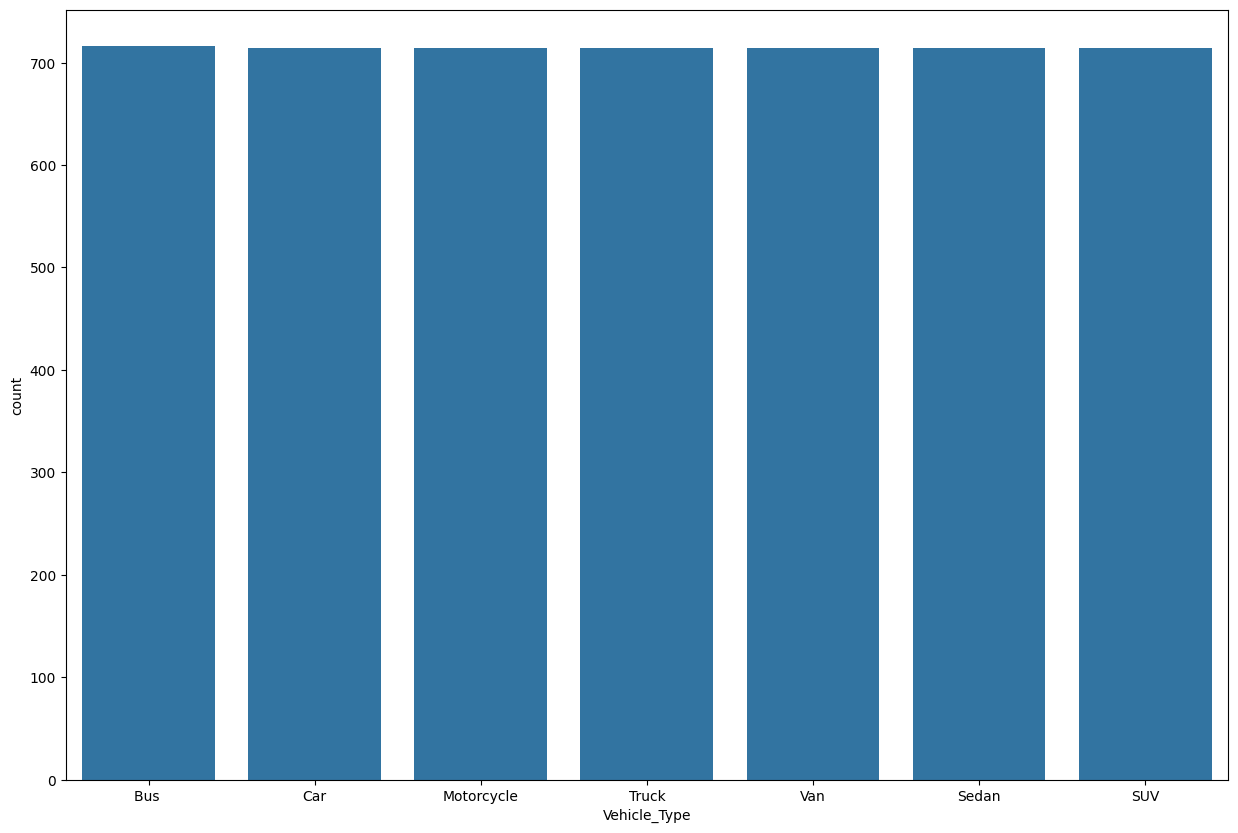

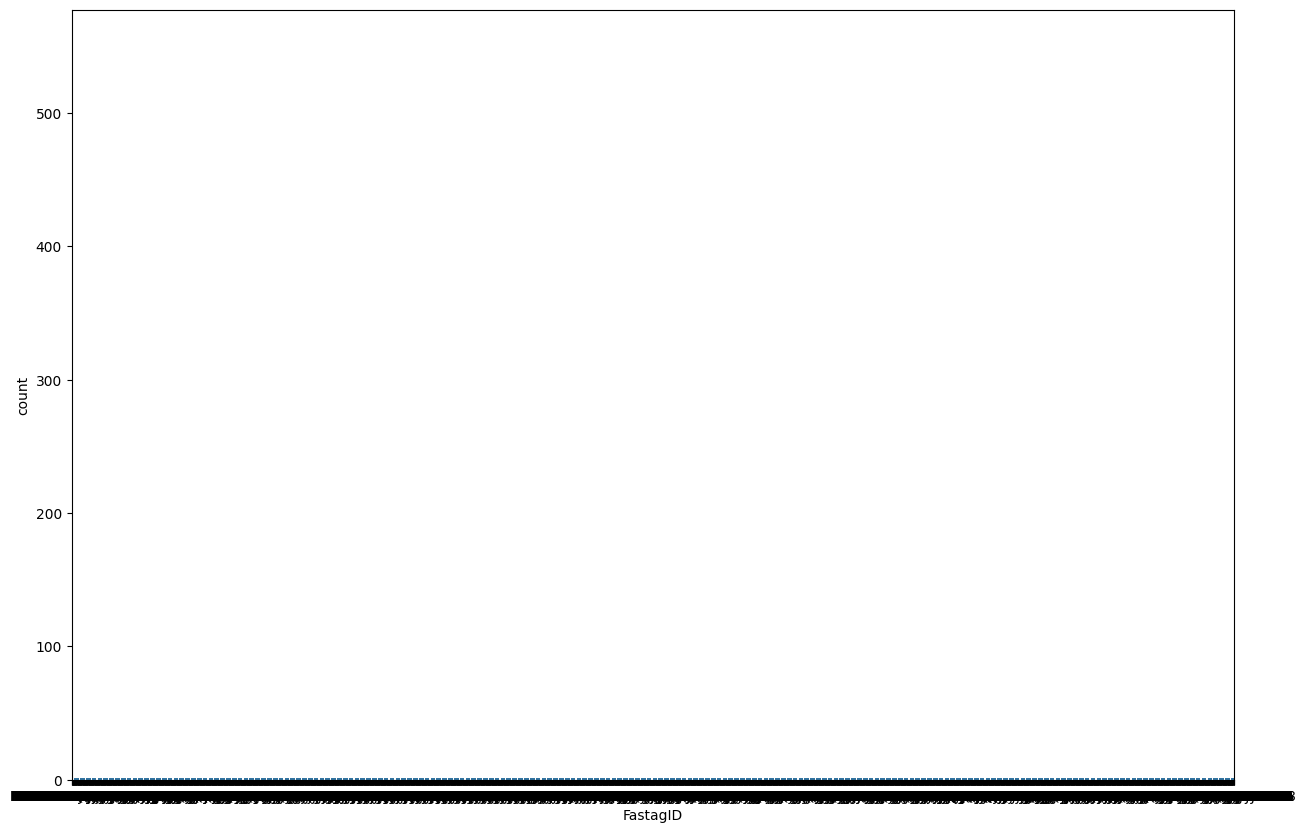

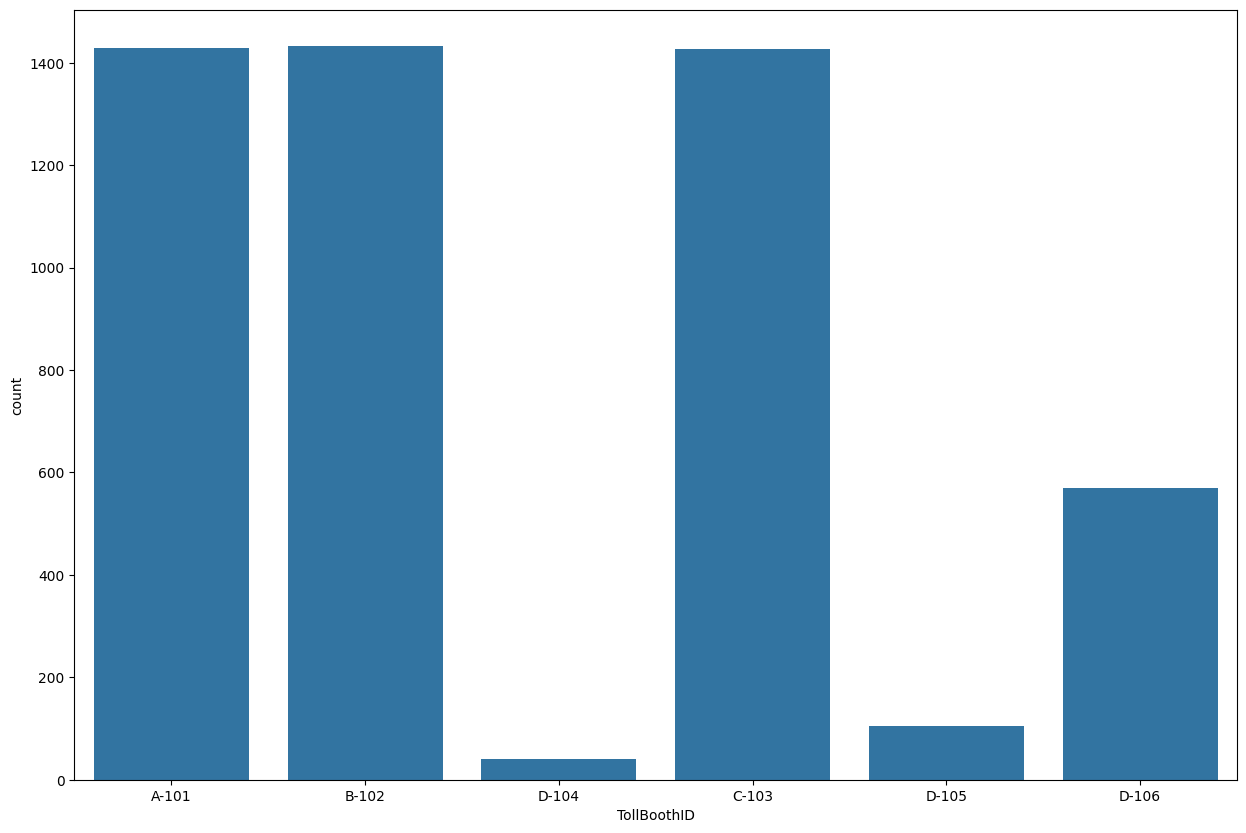

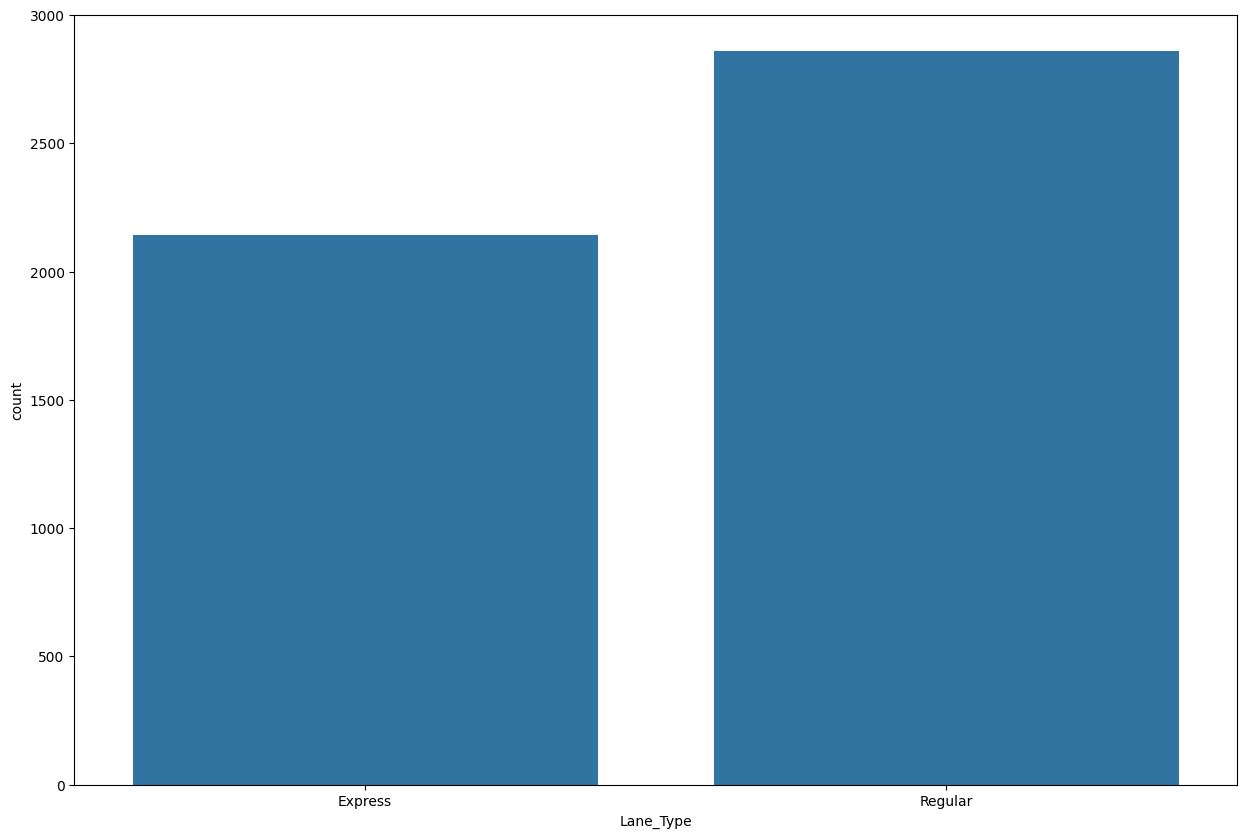

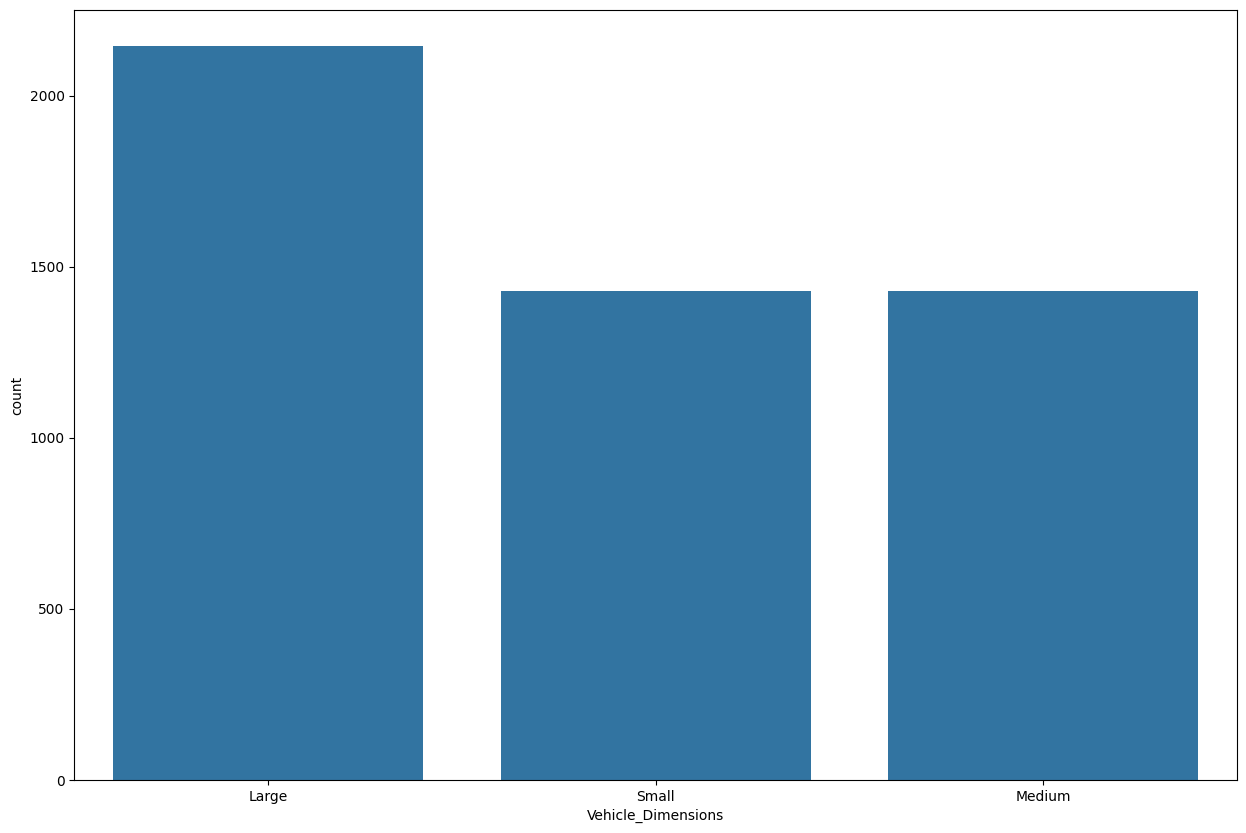

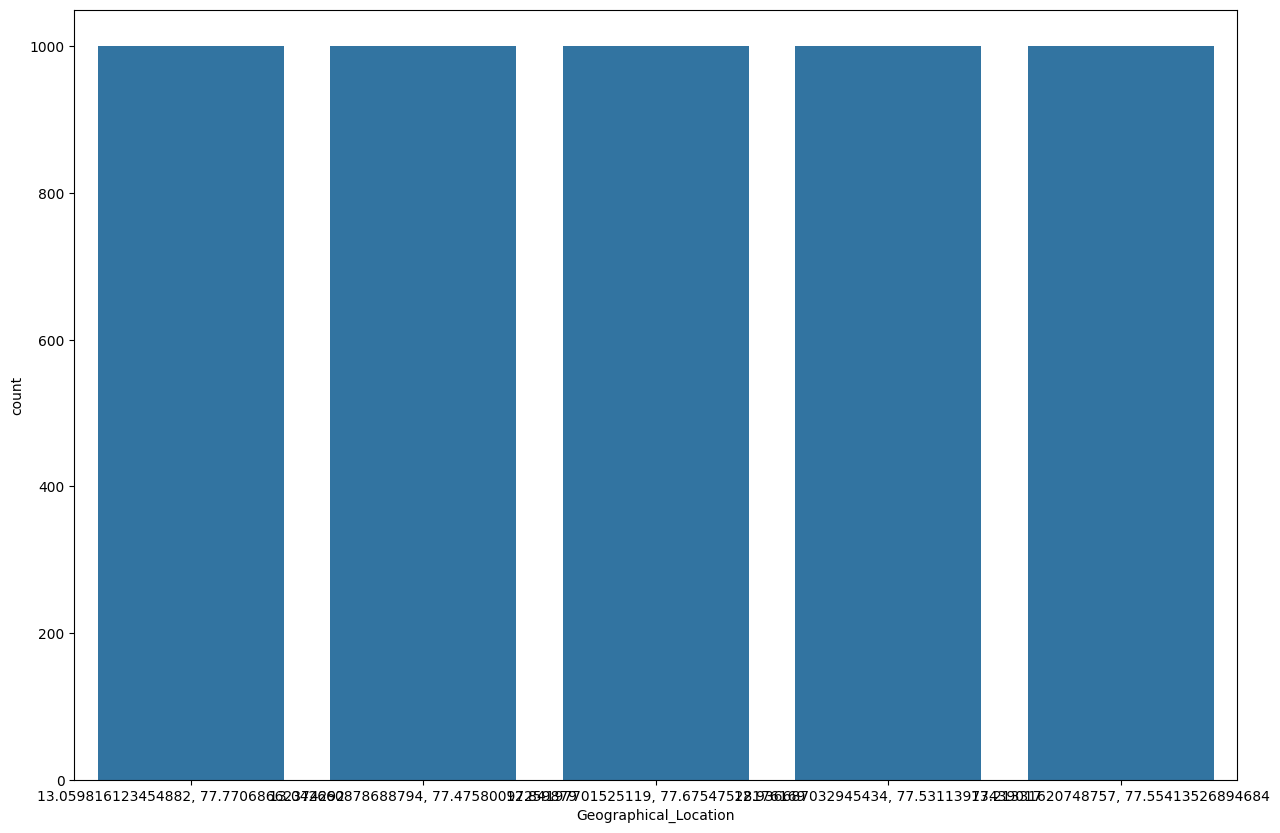

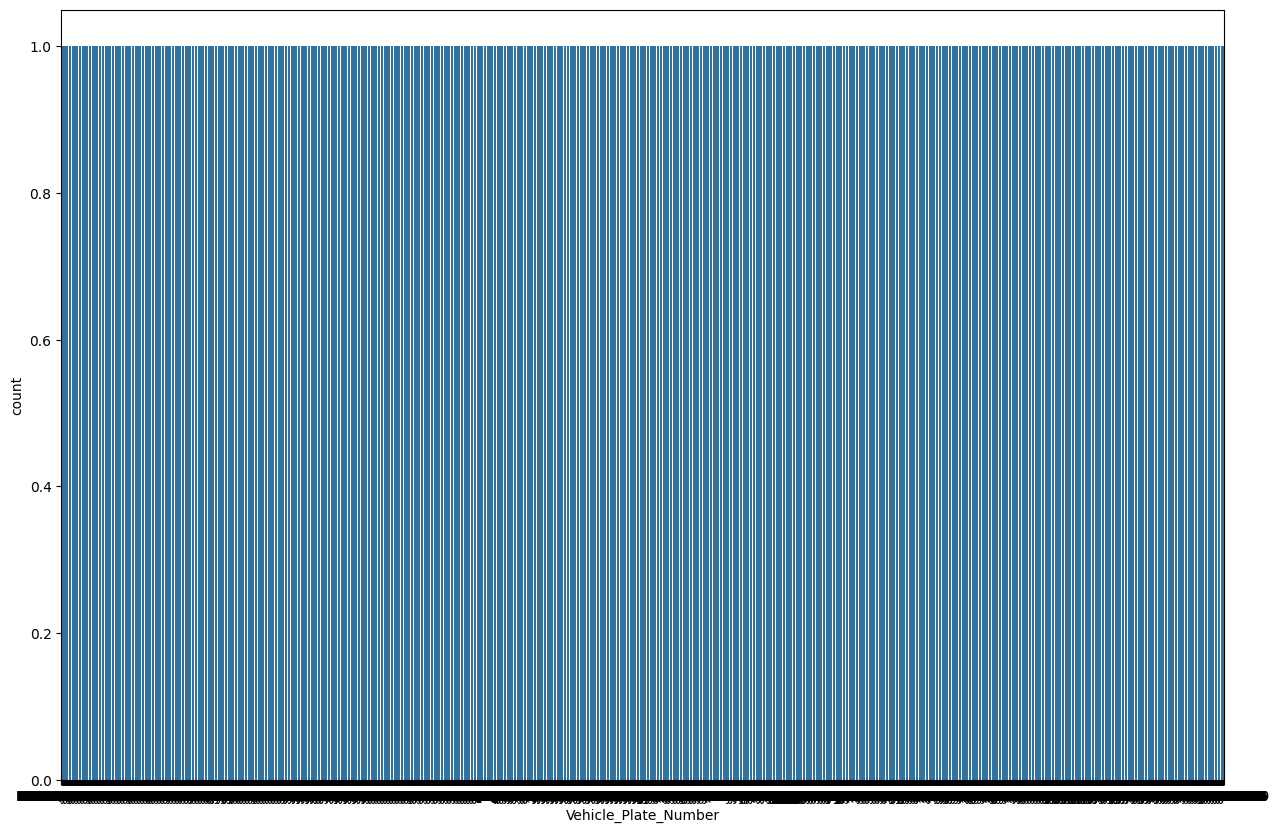

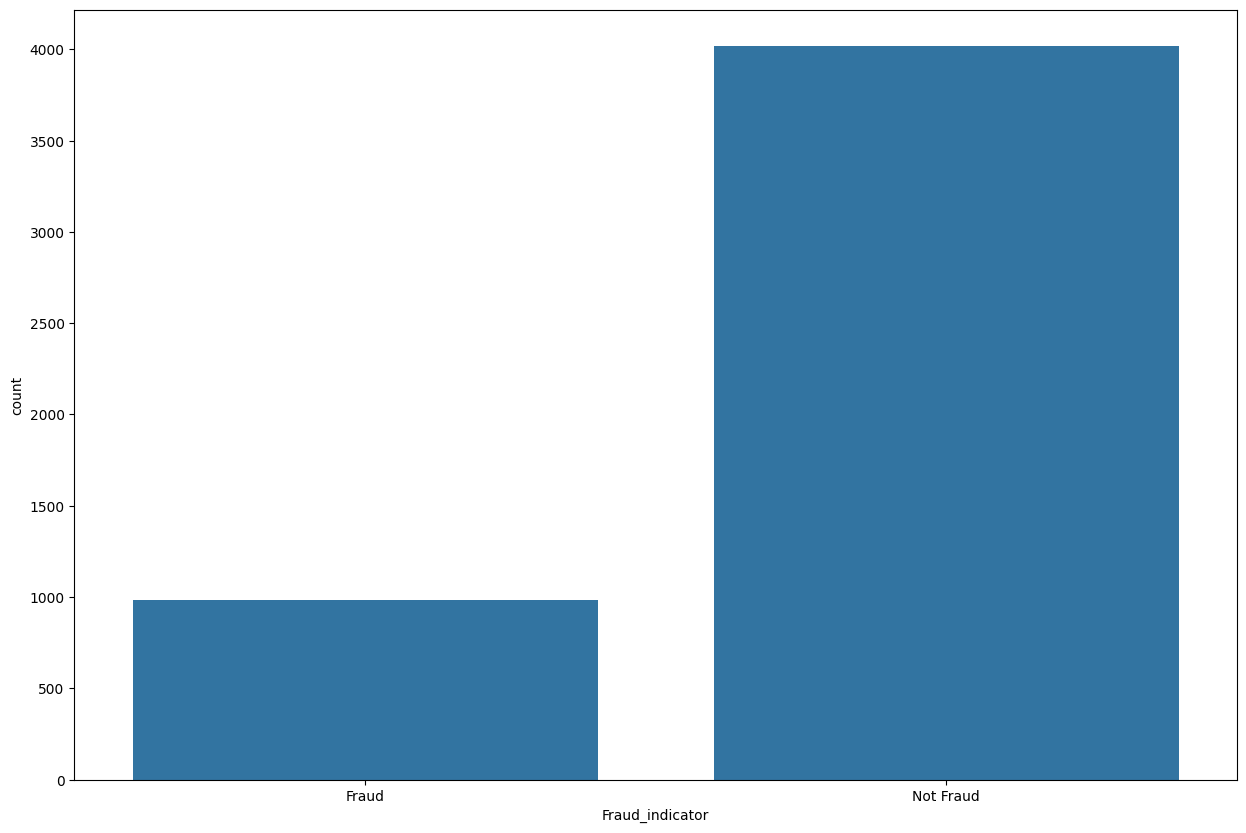

In [14]:
#Count Plots for Categorical Columns
categorical = ['Timestamp', 'Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
               'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']

for col in categorical:
  plt.figure(figsize = (15, 10))
  sns.countplot(x = col, data = data)
  plt.show()

In [ ]:
#Code from 06/18/24 (Continued)

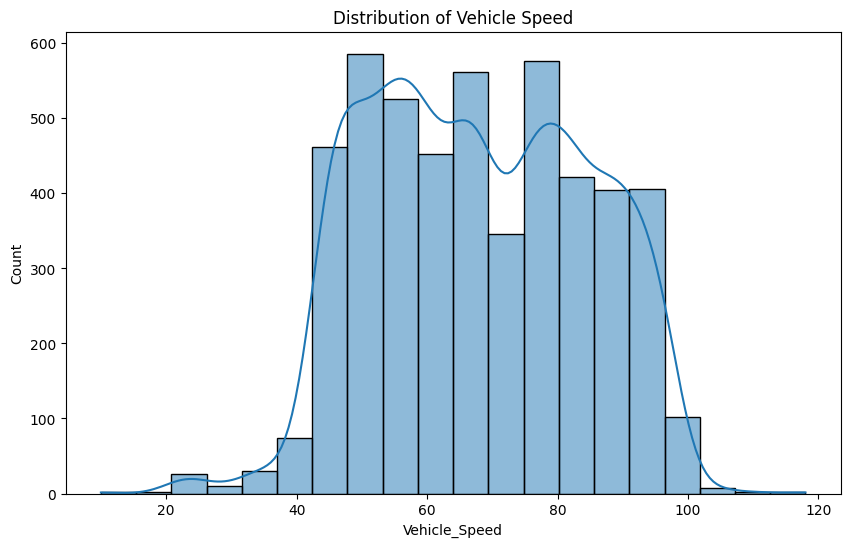

In [15]:
#Distribution of Vehicle Speed
plt.figure(figsize = (10, 6))
sns.histplot(data = data, x = 'Vehicle_Speed', bins = 20, kde = True)
plt.title('Distribution of Vehicle Speed')
plt.show()

<Figure size 1200x1000 with 0 Axes>

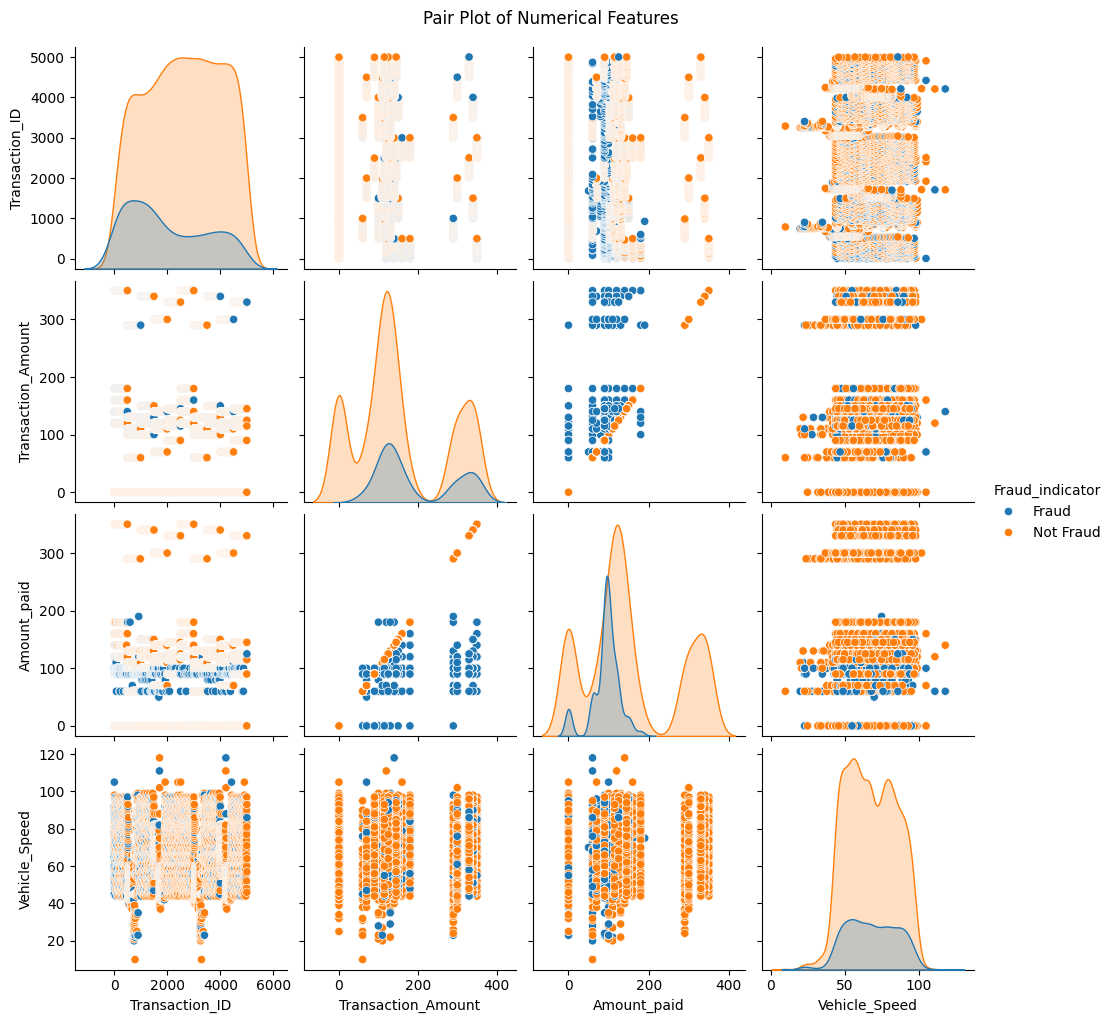

In [16]:
#Pair Plot for Numerical Features
plt.figure(figsize = (12, 10))
sns.pairplot(data, diag_kind = 'kde', hue = 'Fraud_indicator')
plt.suptitle('Pair Plot of Numerical Features', y = 1.02)
plt.show()

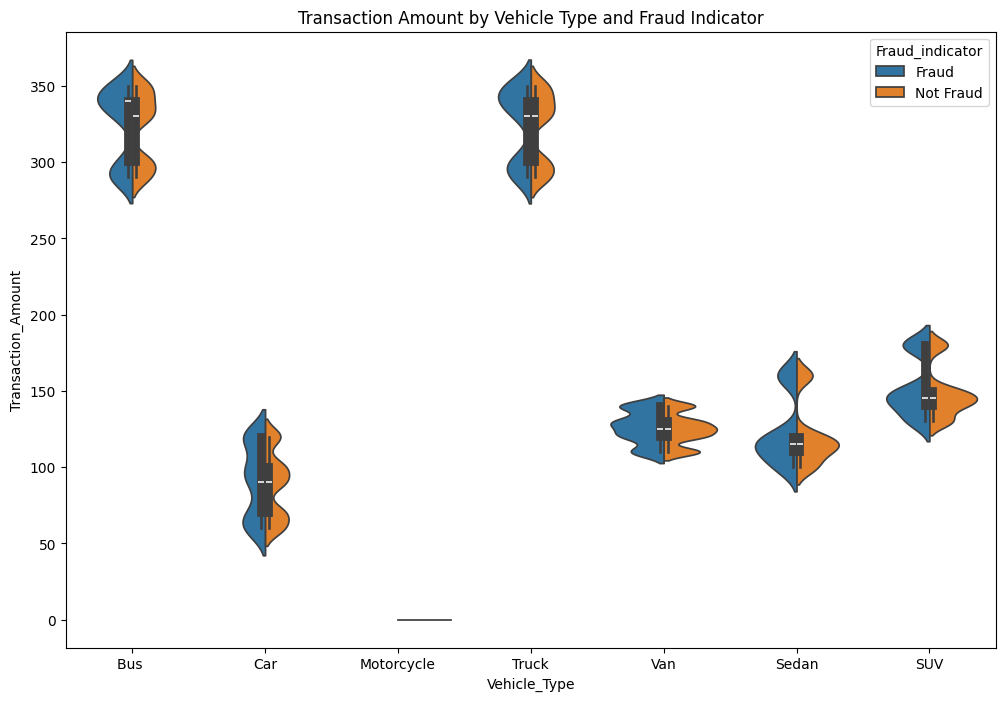

In [18]:
#Violin Plot for Transaction Amount by Vehicle Type and Fraud Indicator
plt.figure(figsize = (12, 8))
sns.violinplot(data = data, x = 'Vehicle_Type', y = 'Transaction_Amount', hue = 'Fraud_indicator', split = True)
plt.title('Transaction Amount by Vehicle Type and Fraud Indicator')
plt.show()

## Detecting Outliers

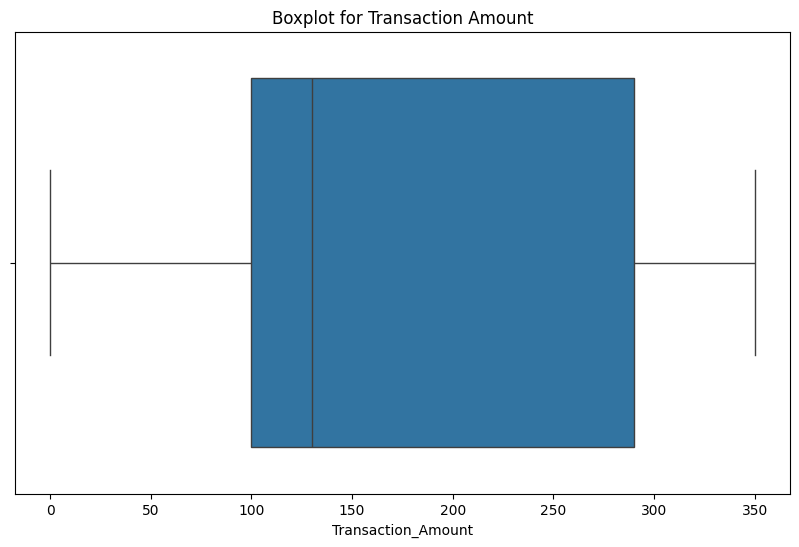

In [20]:
#Boxplot for Detecting Outliers for Transaction Amount
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'Transaction_Amount')
plt.title('Boxplot for Transaction Amount')
plt.show()

## Correlation Analysis

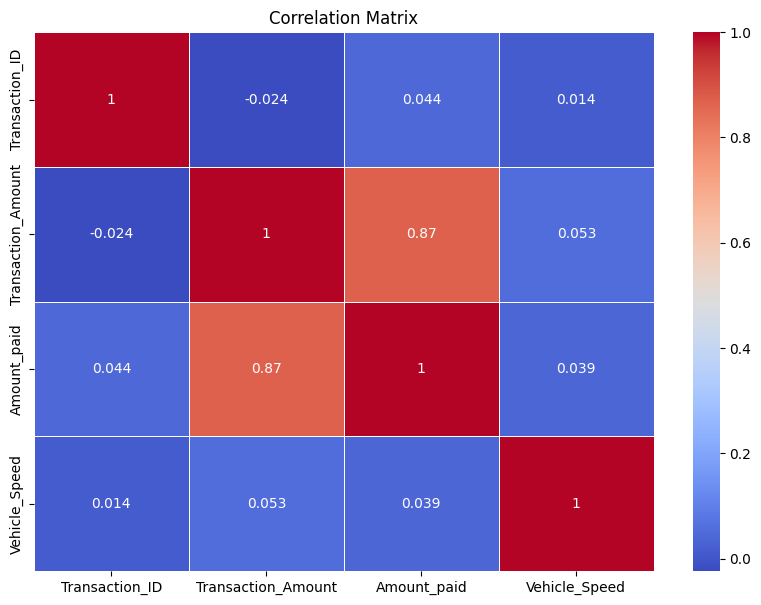

In [28]:
#Correlation Matrix
corr_matrix = data.corr(numeric_only = True)

#Heatmap of Correlation Matrix
plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

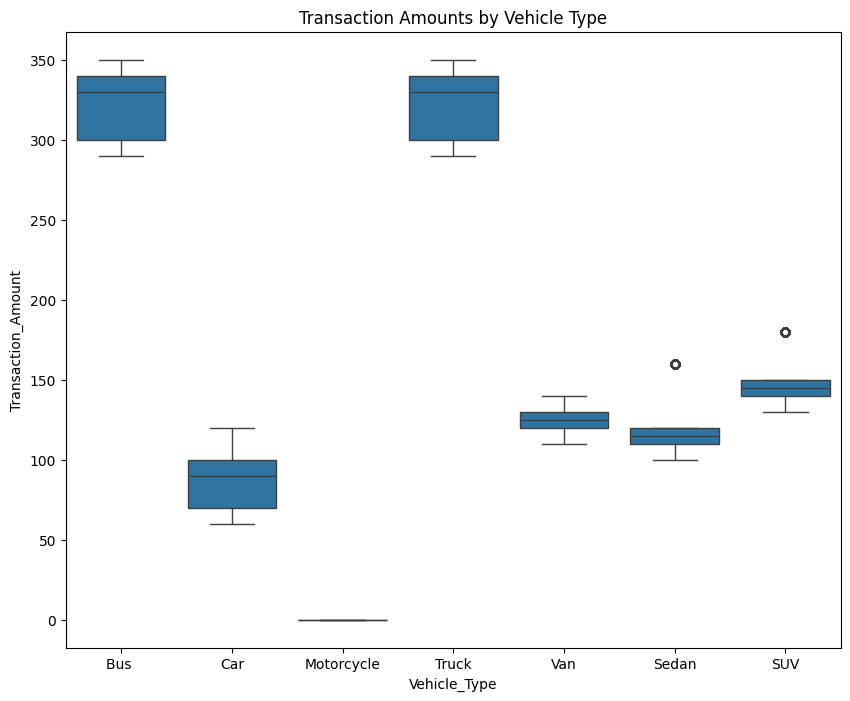

In [26]:
#How do transaction amounts vary by vehicle type (e.g., Car, Bus, Truck)?

#Transaction Amounts by Vehicle Type
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = 'Vehicle_Type', y = 'Transaction_Amount')
plt.title('Transaction Amounts by Vehicle Type')
plt.show()

In [45]:
#Is there a correlation between vehicle speed and the likelihood of a transaction being fraudulent?

correlation = data[['Vehicle_Speed', 'Transaction_Amount']].corr()
print(correlation)

                    Vehicle_Speed  Transaction_Amount
Vehicle_Speed            1.000000            0.053229
Transaction_Amount       0.053229            1.000000
0.05322881075152181
